Plotting some trends to see if throughput affects websocket response times

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the file into a list of strings
with open("application_60.log", "r") as f:
    lines = f.readlines()

# Define a function to parse a line into the desired columns
def parse_line(line):
    # Extract the timestamp, currency pair, and delay from the line
    timestamp_match = re.search(r"(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{6}-\d{2}:\d{2})", line)
    pair_match = re.search(r"pair ([\w/]+):", line)
    delay_match = re.search(r": (\d+\.\d+) seconds", line)
    
    if timestamp_match and pair_match and delay_match:
        return {
            "timestamp": timestamp_match.group(1),
            "pair": pair_match.group(1),
            "processing_delay": float(delay_match.group(1))
        }
    return None

# Parse each line and filter out any None values (for lines that don't match the desired pattern)
parsed_data = [parse_line(line) for line in lines]
parsed_data = [d for d in parsed_data if d]

# Convert the parsed data to a pandas DataFrame
df = pd.DataFrame(parsed_data)

# Convert the 'timestamp' column to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the dataframe by timestamp
df = df.sort_values(by='timestamp')

# Compute the cumulative sum of tasks
df['cumulative_tasks'] = range(1, len(df) + 1)

# Get the number of tasks from the prior x time
def count_prior_second(current_timestamp, timestamp_series, seconds=1):
    one_second_prior = current_timestamp - pd.Timedelta(seconds=seconds)
    return ((timestamp_series > one_second_prior) & (timestamp_series <= current_timestamp)).sum()

for seconds in [1, 0.5, 0.1, 0.05, 0.01]:
    df[f'count_{seconds}'] = df['timestamp'].apply(lambda x: count_prior_second(x, df['timestamp'], seconds=seconds))


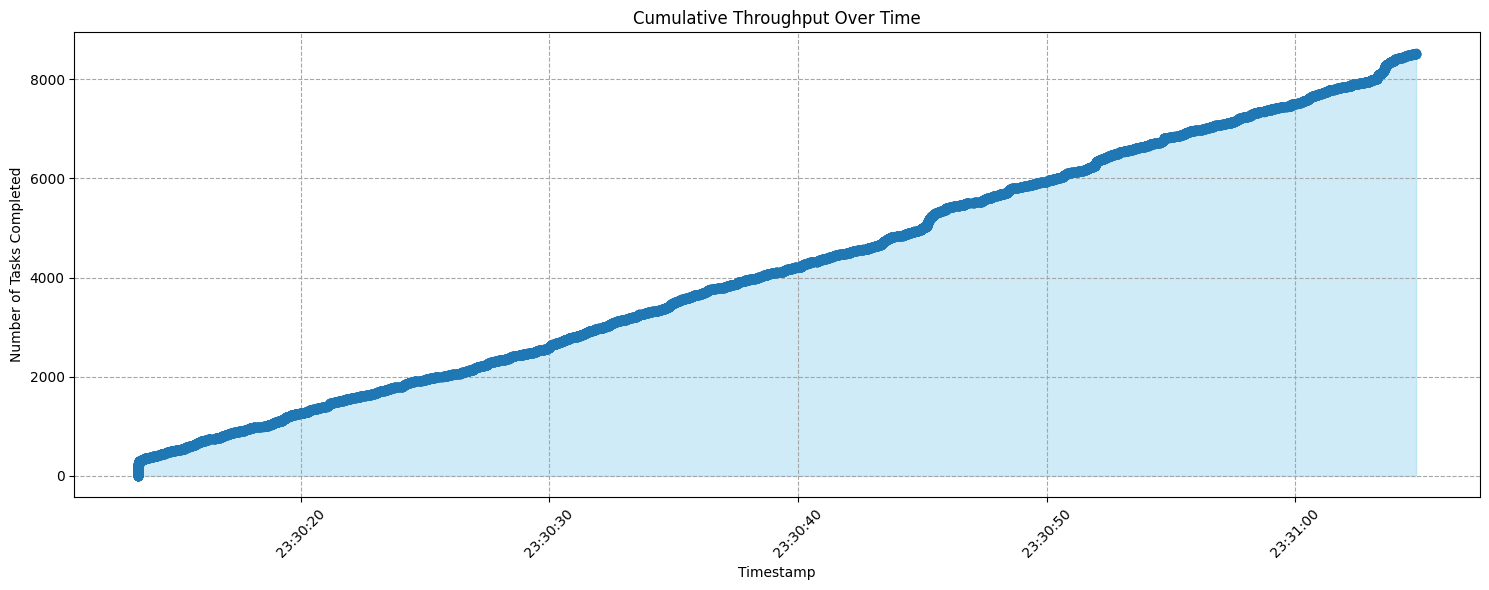

In [2]:
# Plot cumulative tasks
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['cumulative_tasks'], marker='o', linestyle='-')
plt.fill_between(df['timestamp'], df['cumulative_tasks'], color="skyblue", alpha=0.4)

plt.title('Cumulative Throughput Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tasks Completed')
plt.grid(True, which="both", ls="--", c='0.65')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

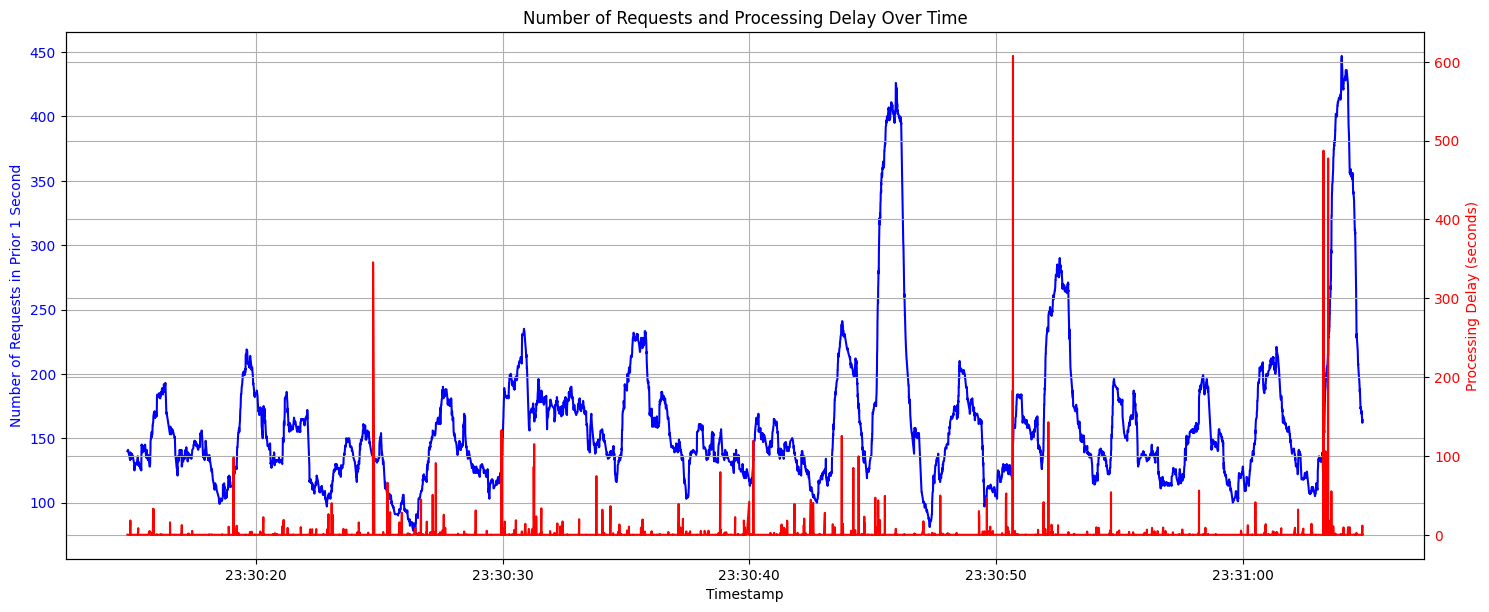

In [3]:
df2 = df.iloc[500:]  # Ignore the startup times (not representative)

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primary Y-axis (count of requests)
color = 'blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Number of Requests in Prior 1 Second', color='blue')
ax1.plot(df2['timestamp'], df2['count_1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(None)

# Create secondary Y-axis (processing delay)
ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Processing Delay (seconds)', color=color)
ax2.plot(df2['timestamp'], df2['processing_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

# Format and display
fig.tight_layout()
plt.title('Number of Requests and Processing Delay Over Time')
plt.xticks(rotation=45)
plt.show()


In [4]:
df2.columns

Index(['timestamp', 'pair', 'processing_delay', 'cumulative_tasks', 'count_1',
       'count_0.5', 'count_0.1', 'count_0.05', 'count_0.01'],
      dtype='object')

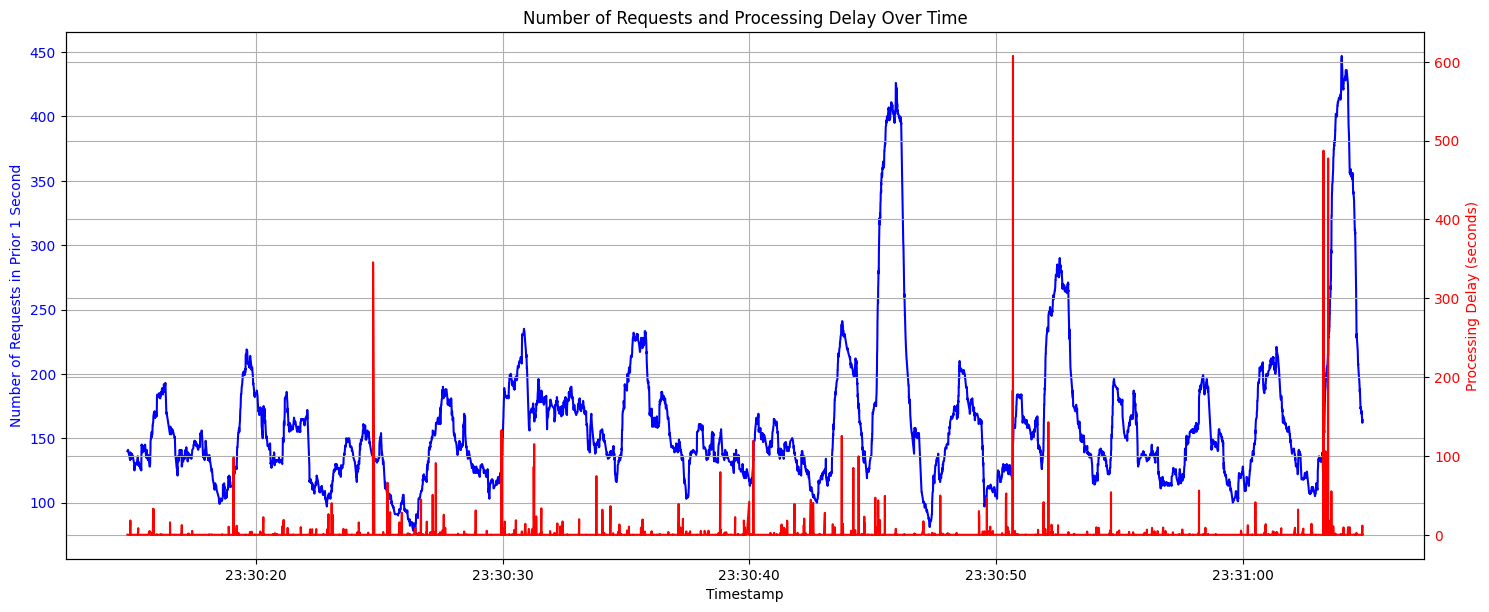

In [5]:
df2 = df.iloc[500:]

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primary Y-axis (count of requests)
color = 'blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Number of Requests in Prior 1 Second', color='blue')
ax1.plot(df2['timestamp'], df2['count_1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(None)

# Create secondary Y-axis (processing delay)
ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Processing Delay (seconds)', color=color)
ax2.plot(df2['timestamp'], df2['processing_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

# Format and display
fig.tight_layout()
plt.title('Number of Requests and Processing Delay Over Time')
plt.xticks(rotation=45)
plt.show()


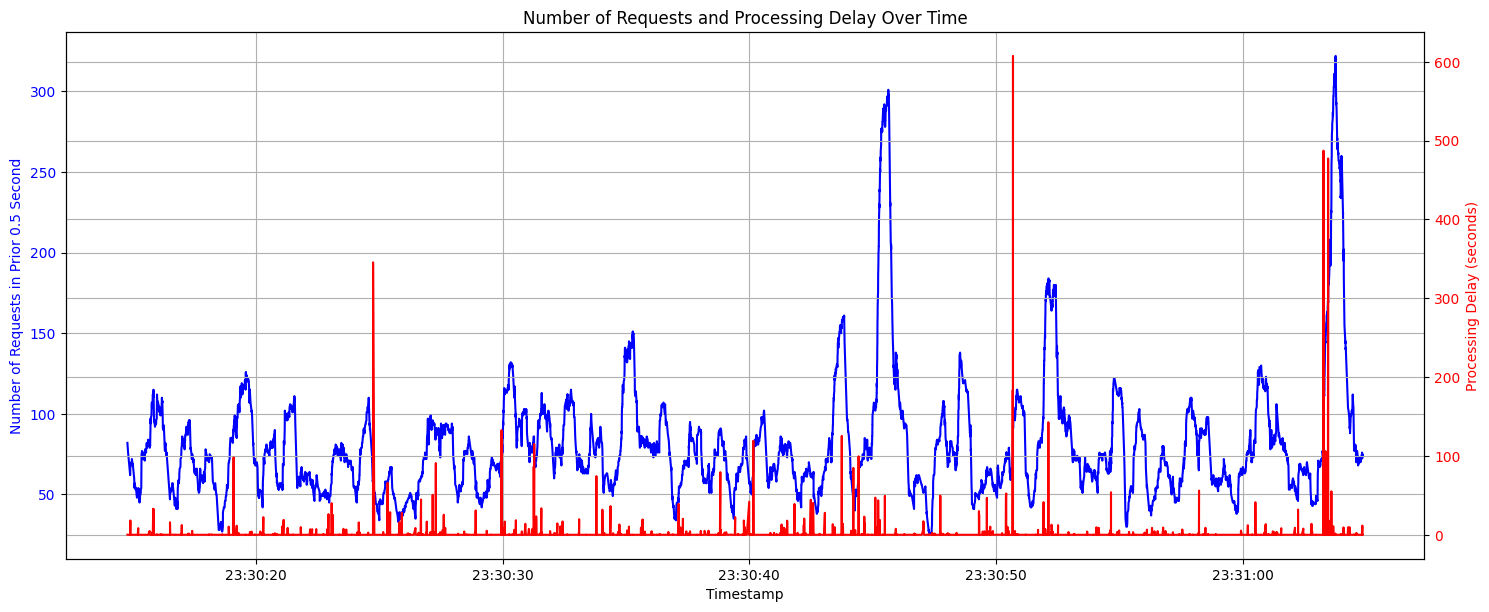

In [6]:
df2 = df.iloc[500:]

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primary Y-axis (count of requests)
color = 'blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Number of Requests in Prior 0.5 Second', color='blue')
ax1.plot(df2['timestamp'], df2['count_0.5'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(None)

# Create secondary Y-axis (processing delay)
ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Processing Delay (seconds)', color=color)
ax2.plot(df2['timestamp'], df2['processing_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

# Format and display
fig.tight_layout()
plt.title('Number of Requests and Processing Delay Over Time')
plt.xticks(rotation=45)
plt.show()


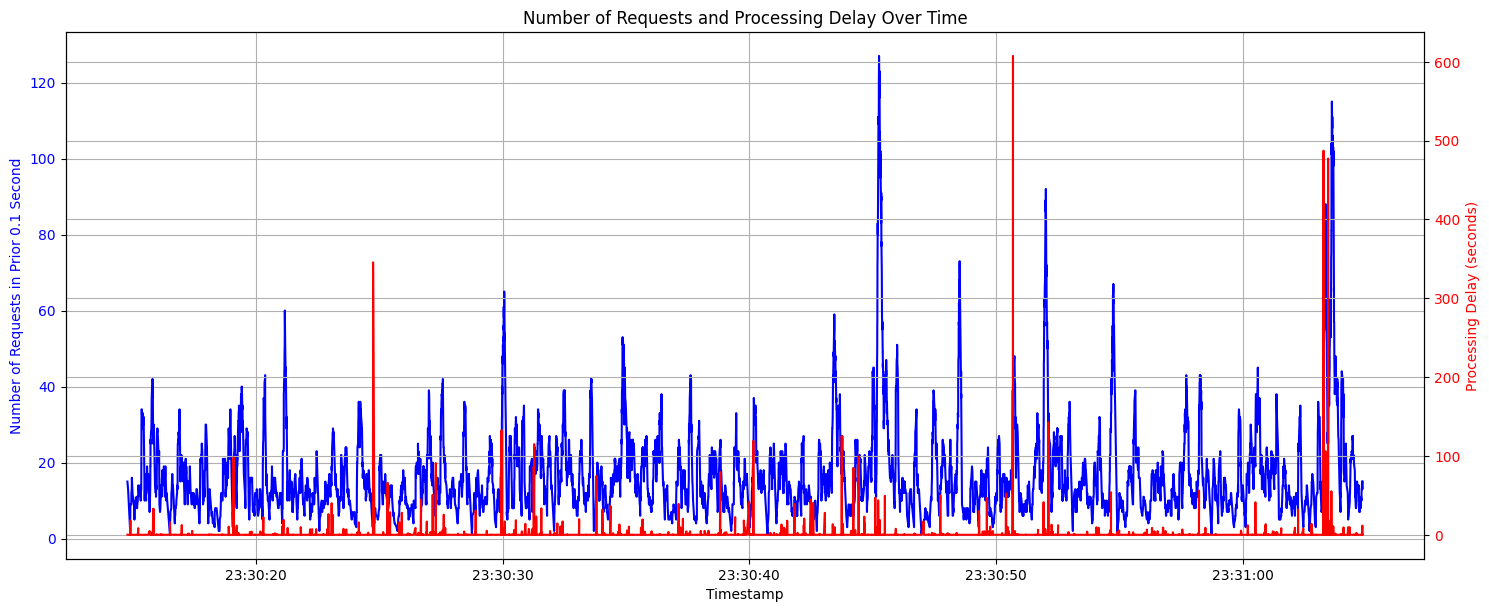

In [7]:
df2 = df.iloc[500:]

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primary Y-axis (count of requests)
color = 'blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Number of Requests in Prior 0.1 Second', color='blue')
ax1.plot(df2['timestamp'], df2['count_0.1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(None)

# Create secondary Y-axis (processing delay)
ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Processing Delay (seconds)', color=color)
ax2.plot(df2['timestamp'], df2['processing_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

# Format and display
fig.tight_layout()
plt.title('Number of Requests and Processing Delay Over Time')
plt.xticks(rotation=45)
plt.show()


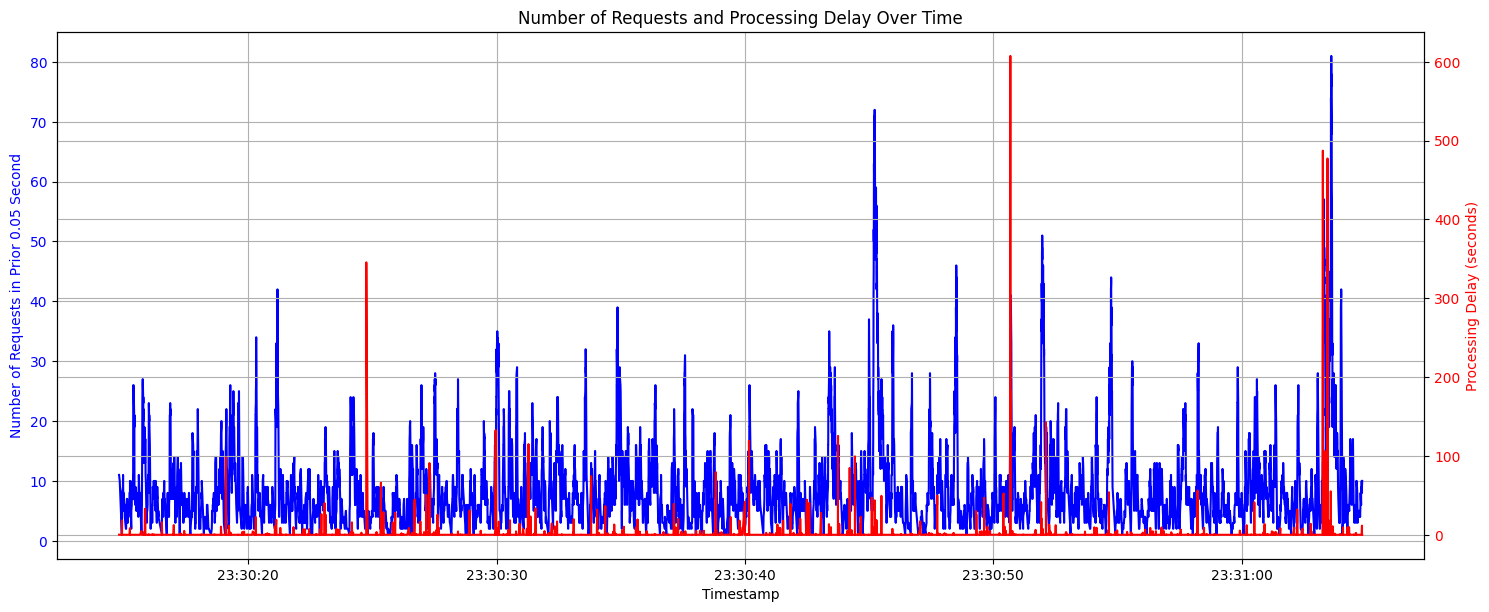

In [8]:
df2 = df.iloc[500:]

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primary Y-axis (count of requests)
color = 'blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Number of Requests in Prior 0.05 Second', color='blue')
ax1.plot(df2['timestamp'], df2['count_0.05'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(None)

# Create secondary Y-axis (processing delay)
ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Processing Delay (seconds)', color=color)
ax2.plot(df2['timestamp'], df2['processing_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

# Format and display
fig.tight_layout()
plt.title('Number of Requests and Processing Delay Over Time')
plt.xticks(rotation=45)
plt.show()


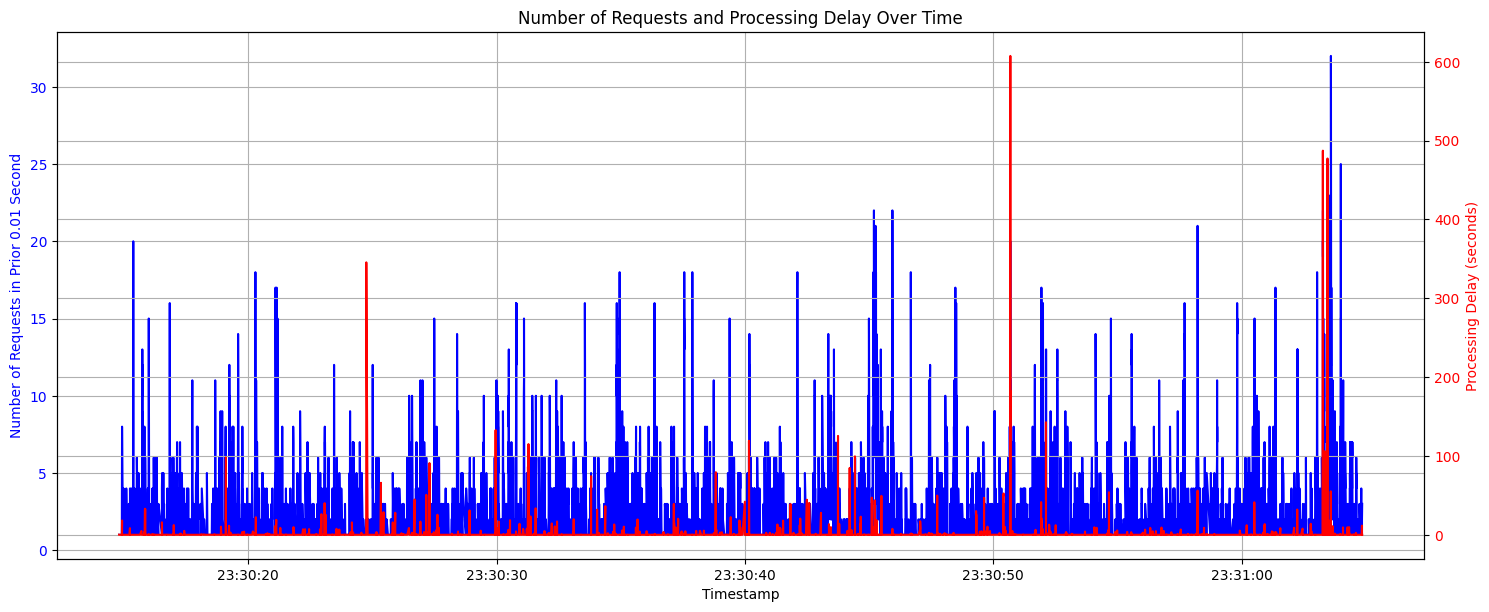

In [9]:
df2 = df.iloc[500:]

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primary Y-axis (count of requests)
color = 'blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Number of Requests in Prior 0.01 Second', color='blue')
ax1.plot(df2['timestamp'], df2['count_0.01'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(None)

# Create secondary Y-axis (processing delay)
ax2 = ax1.twinx()  
color = 'red'
ax2.set_ylabel('Processing Delay (seconds)', color=color)
ax2.plot(df2['timestamp'], df2['processing_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

# Format and display
fig.tight_layout()
plt.title('Number of Requests and Processing Delay Over Time')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='count_1'>

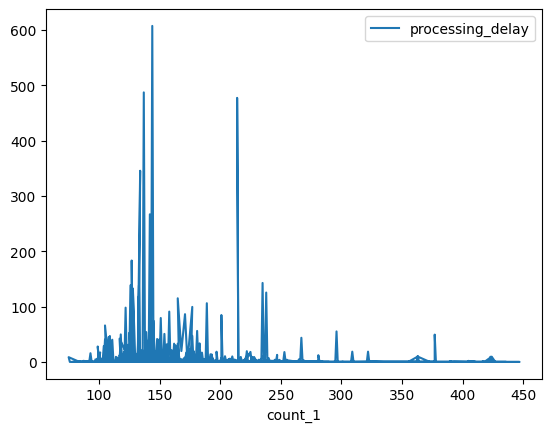

In [17]:
df2.plot('count_1', 'processing_delay')

In [19]:
df2.describe()

,processing_delay,cumulative_tasks,count_1,count_0.5,count_0.1,count_0.05,count_0.01
count,8019.000000,8019.000000,8019.000000,8019.000000,8019.000000,8019.000000,8019.000000
mean,0.945050,4510.000000,172.516523,92.527123,23.410276,13.364385,4.395810
std,12.819846,2315.030237,67.166738,50.690479,19.011970,11.537305,3.827271
min,0.023376,501.000000,75.000000,25.000000,1.000000,1.000000,1.000000
25%,0.024835,2505.500000,132.000000,62.000000,12.000000,6.000000,2.000000
50%,0.025507,4510.000000,154.000000,79.000000,18.000000,10.000000,3.000000
75%,0.027144,6514.500000,185.000000,102.000000,28.000000,16.000000,6.000000
max,607.445305,8519.000000,447.000000,322.000000,127.000000,81.000000,32.000000
